In [10]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from soma import aims

In [8]:
ACC_dir = '/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/skeletons/2mm/R'
subs = os.listdir(ACC_dir)
subs = [sub for sub in subs if sub[-1]!='f']
average_skel = np.zeros((96,114,96,1))
for sub in subs:
    vol = aims.read(os.path.join(ACC_dir, sub))
    vol_np = vol.np
    vol_np = vol_np != 0
    average_skel += vol_np

In [9]:
np.unique(average_skel)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 149., 150., 15

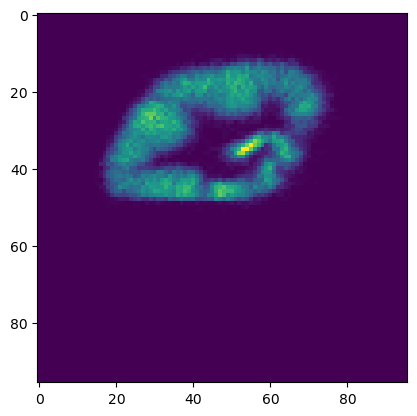

In [24]:
plt.imshow(average_skel[:,70,:,0])
plt.show()

In [52]:
k = 30
masked_average = average_skel > k

In [53]:
intersection_list = []
for sub in subs:
    vol = aims.read(os.path.join(ACC_dir, sub))
    vol_np = vol.np
    vol_np = vol_np != 0
    intersection = np.sum(np.logical_and(masked_average, vol_np))
    intersection_list.append(intersection)

In [54]:
df_intersection = pd.DataFrame({'Subject': subs, 'intersection': intersection_list})
df_intersection = df_intersection.sort_values(by='intersection')

In [57]:
df_intersection[:40]

,Subject,intersection
98,Rresampled_skeleton_nih_chp_02373_t1.nii.gz,2689
199,Rresampled_skeleton_nih_chp_01211_t1.nii.gz,3308
90,Rresampled_skeleton_sub-active08_ses-pretraini...,4879
328,Rresampled_skeleton_nih_chp_03880_t1.nii.gz,5560
216,Rresampled_skeleton_sub-inhibition28_ses-pretr...,6144
126,Rresampled_skeleton_nih_chp_05185_t1.nii.gz,6523
166,Rresampled_skeleton_nih_chp_05041_t1.nii.gz,6599
329,Rresampled_skeleton_nih_chp_04816_t1.nii.gz,6601
238,Rresampled_skeleton_nih_chp_05284_t1.nii.gz,6887
94,Rresampled_skeleton_sub-active07_ses-pretraini...,6891


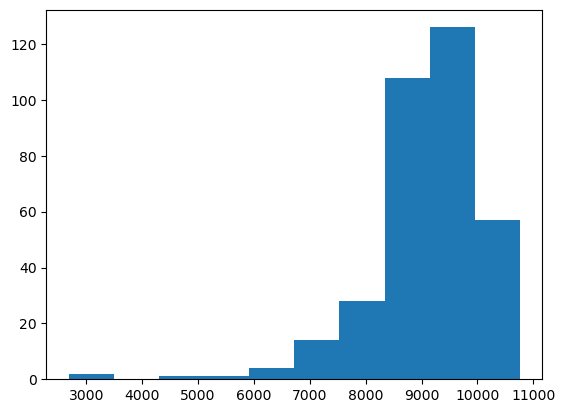

In [56]:
plt.hist(df_intersection['intersection'])
plt.show()

In [91]:
subjects = df_intersection['Subject'].to_list()[10:]
subjects = [sub[20:-7] for sub in subjects]

In [92]:
# filter train val test
train_subs = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_train.csv', header=None)
val_subs = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_val.csv', header=None)
test_subs = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_test.csv', header=None)

In [93]:
filtered_train = train_subs[train_subs[0].isin(subjects)]
filtered_val = val_subs[val_subs[0].isin(subjects)]
filtered_test = test_subs[test_subs[0].isin(subjects)]

In [94]:
print(len(train_subs), len(val_subs), len(test_subs))
print(len(filtered_train), len(filtered_val), len(filtered_test))

239 34 68
233 34 66


In [95]:
filtered_train.to_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_filtered_train.csv', header=None, index=None)
filtered_val.to_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_filtered_val.csv', header=None, index=None)
filtered_test.to_csv('/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/train_val_test/ACCpatterns_subjects_filtered_test.csv', header=None, index=None)